In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paris-2024-olympic-games-track-and-field-results/results.csv
/kaggle/input/paris-2024-olympic-games-track-and-field-results/events.csv


In [2]:
df = pd.read_csv('/kaggle/input/paris-2024-olympic-games-track-and-field-results/events.csv')

In [3]:
df

,local_time,sex,event,round,startlist_url,results_url,summary_url,points_url
0,08:00,M,20 Kilometres Race Walk,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN
1,09:50,W,20 Kilometres Race Walk,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN
2,10:05,M,100 Metres,Decathlon,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...
3,10:10,M,Hammer Throw,Qualification Group A,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN
4,10:15,W,High Jump,Qualification,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN
...,...,...,...,...,...,...,...,...
134,19:50,M,5000 Metres,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN
135,20:15,W,1500 Metres,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN
136,21:00,M,4x400 Metres Relay,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN
137,21:14,W,4x400 Metres Relay,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN


In [4]:
df_result = pd.read_csv('/kaggle/input/paris-2024-olympic-games-track-and-field-results/results.csv')

In [5]:
df_result.sample(20)

,local_time,sex,event,round,startlist_url,results_url,summary_url,points_url,pos,bib,name,country,mark
1999,10:20,M,Javelin Throw,Qualification Group A,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,2.0,988.0,Julius YEGO,KEN,85.97
1040,19:50,W,100 Metres,Semi-Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,4.0,2269.0,Ewa SWOBODA,POL,11.08
3154,12:05,W,100 Metres Hurdles,Semi-Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,8.0,1804.0,Lotta HARALA,FIN,13.05
2427,11:10,M,5000 Metres,Heats,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,7.0,655.0,Hugo HAY,FRA,14:09.22 Q
1369,12:35,W,400 Metres Hurdles,Heats,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,1.0,2170.0,Femke BOL,NED,53.38 Q
1346,11:50,M,110 Metres Hurdles,Heats,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,2.0,891.0,Rasheed BROADBELL,JAM,13.42 Q
836,11:20,W,800 Metres,Repechage Round,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,5.0,1598.0,Flavia Maria DE LIMA,BRA,2:01.64
576,19:45,W,800 Metres,Heats,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,1.0,1874.0,Keely HODGKINSON,GBR,1:59.31 Q
2596,19:05,M,110 Metres Hurdles,Semi-Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,6.0,489.0,Weibo QIN,CHN,13.41
984,19:10,M,Javelin Throw,Decathlon Group A,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,8.0,602.0,Jorge UREÑA,ESP,57.93


In [6]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   local_time     3550 non-null   object 
 1   sex            3550 non-null   object 
 2   event          3550 non-null   object 
 3   round          3550 non-null   object 
 4   startlist_url  3550 non-null   object 
 5   results_url    3550 non-null   object 
 6   summary_url    2777 non-null   object 
 7   points_url     435 non-null    object 
 8   pos            3401 non-null   float64
 9   bib            3404 non-null   float64
 10  name           3550 non-null   object 
 11  country        3550 non-null   object 
 12  mark           3550 non-null   object 
dtypes: float64(2), object(11)
memory usage: 360.7+ KB


In [7]:
df_result = df_result.drop(columns=['startlist_url','results_url','summary_url','points_url'])

In [8]:
df_result

,local_time,sex,event,round,pos,bib,name,country,mark
0,08:00,M,20 Kilometres Race Walk,Final,1.0,29.0,Brian Daniel PINTADO,ECU,1:18:55
1,08:00,M,20 Kilometres Race Walk,Final,2.0,15.0,Caio BONFIM,BRA,1:19:09
2,08:00,M,20 Kilometres Race Walk,Final,3.0,33.0,Álvaro MARTÍN,ESP,1:19:11
3,08:00,M,20 Kilometres Race Walk,Final,4.0,55.0,Massimo STANO,ITA,1:19:12
4,08:00,M,20 Kilometres Race Walk,Final,5.0,18.0,Evan DUNFEE,CAN,1:19:16
...,...,...,...,...,...,...,...,...,...
3545,08:00,W,Marathon,Final,NaN,1917.0,Melat Yisak KEJETA,GER,DNF
3546,08:00,W,Marathon,Final,NaN,2374.0,Jackline SAKILU,TAN,DNF
3547,08:00,W,Marathon,Final,NaN,2297.0,Joan Chelimo MELLY,ROU,DNF
3548,08:00,W,Marathon,Final,NaN,1522.0,Sinead DIVER,AUS,DNF


In [9]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   local_time  3550 non-null   object 
 1   sex         3550 non-null   object 
 2   event       3550 non-null   object 
 3   round       3550 non-null   object 
 4   pos         3401 non-null   float64
 5   bib         3404 non-null   float64
 6   name        3550 non-null   object 
 7   country     3550 non-null   object 
 8   mark        3550 non-null   object 
dtypes: float64(2), object(7)
memory usage: 249.7+ KB


In [10]:
df_result['round'].value_counts()

round
Heats                    914
Final                    773
Semi-Final               344
Qualification            313
Repechage Round          305
Qualification Group A    192
Qualification Group B    192
Decathlon                172
Heptathlon               135
Preliminary Round         82
Decathlon Group A         42
Decathlon Group B         42
Heptathlon Group A        22
Heptathlon Group B        22
Name: count, dtype: int64

In [11]:
df_result['event'].value_counts()

event
100 Metres                        318
800 Metres                        254
Javelin Throw                     238
1500 Metres                       234
400 Metres                        232
200 Metres                        231
Discus Throw                      194
400 Metres Hurdles                184
Marathon                          172
Hammer Throw                      152
High Jump                         133
Long Jump                         132
Shot Put                          131
5000 Metres                       120
100 Metres Hurdles                116
110 Metres Hurdles                114
Pole Vault                        113
3000 Metres Steeplechase          103
20 Kilometres Race Walk            94
Triple Jump                        87
4x400 Metres Relay                 73
10,000 Metres                      52
4x100 Metres Relay                 48
Marathon Race Walk Mixed Relay     25
Name: count, dtype: int64

In [12]:
df_result['country'].value_counts()

country
USA    297
GER    156
FRA    149
AUS    149
GBR    129
      ... 
MLT      1
BAN      1
MHL      1
BRU      1
BHU      1
Name: count, Length: 199, dtype: int64

In [13]:
df_result.describe(include='all')

,local_time,sex,event,round,pos,bib,name,country,mark
count,3550,3550,3550,3550,3401.000000,3404.000000,3550,3550,3550
unique,75,3,24,14,NaN,NaN,1728,199,2737
top,10:05,M,100 Metres,Heats,NaN,NaN,Heath BALDWIN,USA,DNS
freq,238,1793,318,914,NaN,NaN,12,297,50
mean,NaN,NaN,NaN,NaN,7.974713,1339.665981,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,9.535288,695.842457,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,10.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.000000,741.500000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,1292.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,9.000000,1960.000000,NaN,NaN,NaN


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_feature = df_result[(df_result['event']=='100 Metres')& (df_result['round']=='Final')& (df_result['sex']=='M')]

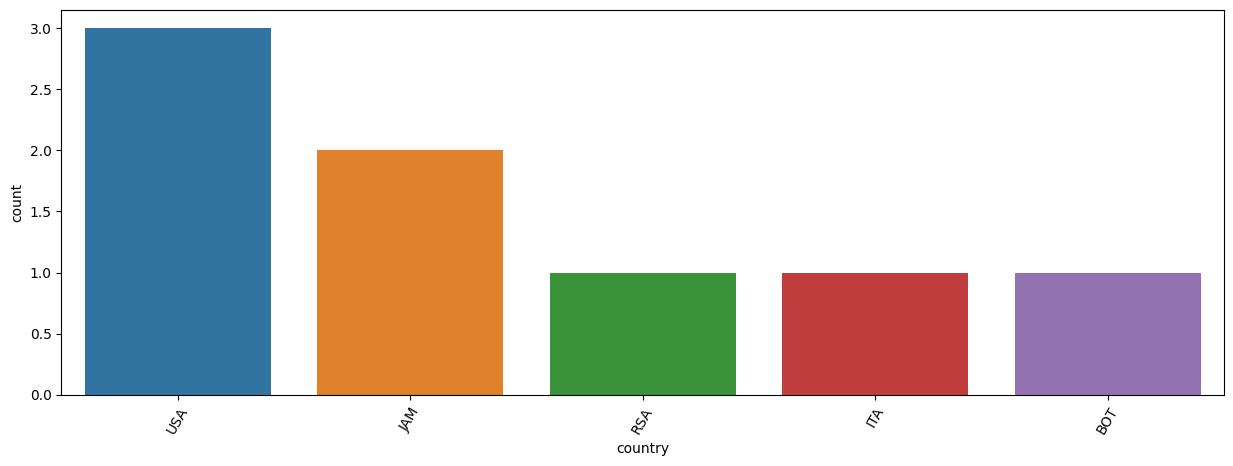

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_feature,x='country')
plt.xticks(rotation=60)
plt.show()

In [17]:
df_result.head()

,local_time,sex,event,round,pos,bib,name,country,mark
0,08:00,M,20 Kilometres Race Walk,Final,1.0,29.0,Brian Daniel PINTADO,ECU,1:18:55
1,08:00,M,20 Kilometres Race Walk,Final,2.0,15.0,Caio BONFIM,BRA,1:19:09
2,08:00,M,20 Kilometres Race Walk,Final,3.0,33.0,Álvaro MARTÍN,ESP,1:19:11
3,08:00,M,20 Kilometres Race Walk,Final,4.0,55.0,Massimo STANO,ITA,1:19:12
4,08:00,M,20 Kilometres Race Walk,Final,5.0,18.0,Evan DUNFEE,CAN,1:19:16


In [18]:
df_result['bib'].value_counts()

bib
772.0     12
367.0     12
1061.0    12
1162.0    12
1290.0    12
          ..
520.0      1
497.0      1
734.0      1
1112.0     1
2461.0     1
Name: count, Length: 1683, dtype: int64

In [19]:
df_feature2 = df_result[(df_result['event']=='Javelin Throw') & (df_result['round']=='Final') & (df_result['sex']=='M')]

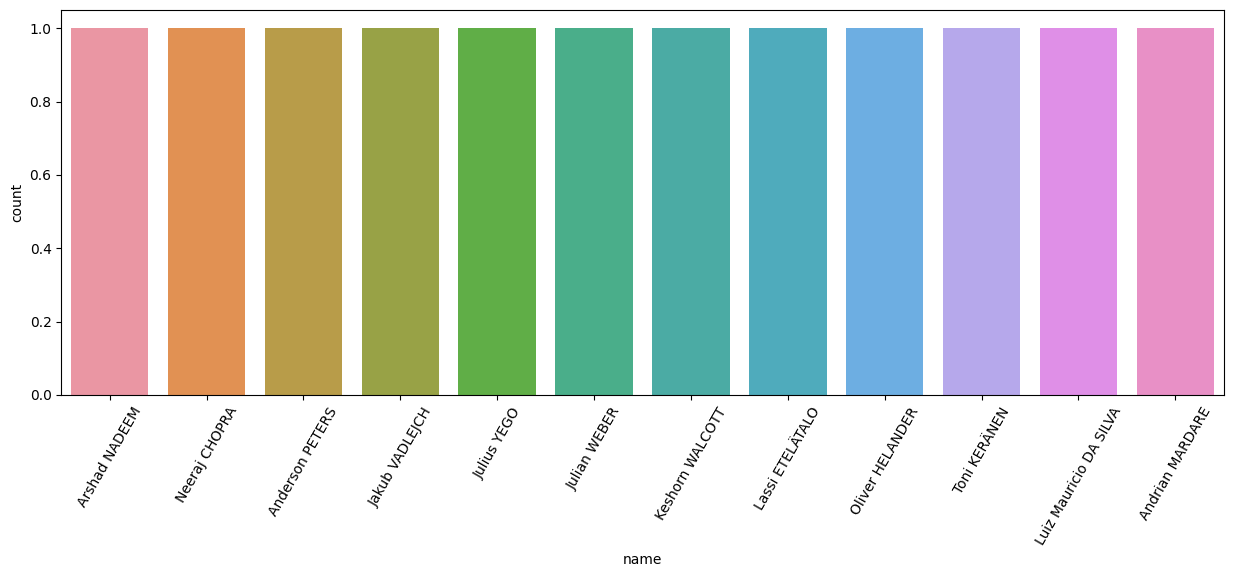

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_feature2,x='name')
plt.xticks(rotation=60)
plt.show()

# count plot for those whose event = 100 meter, round = Final, sex = M

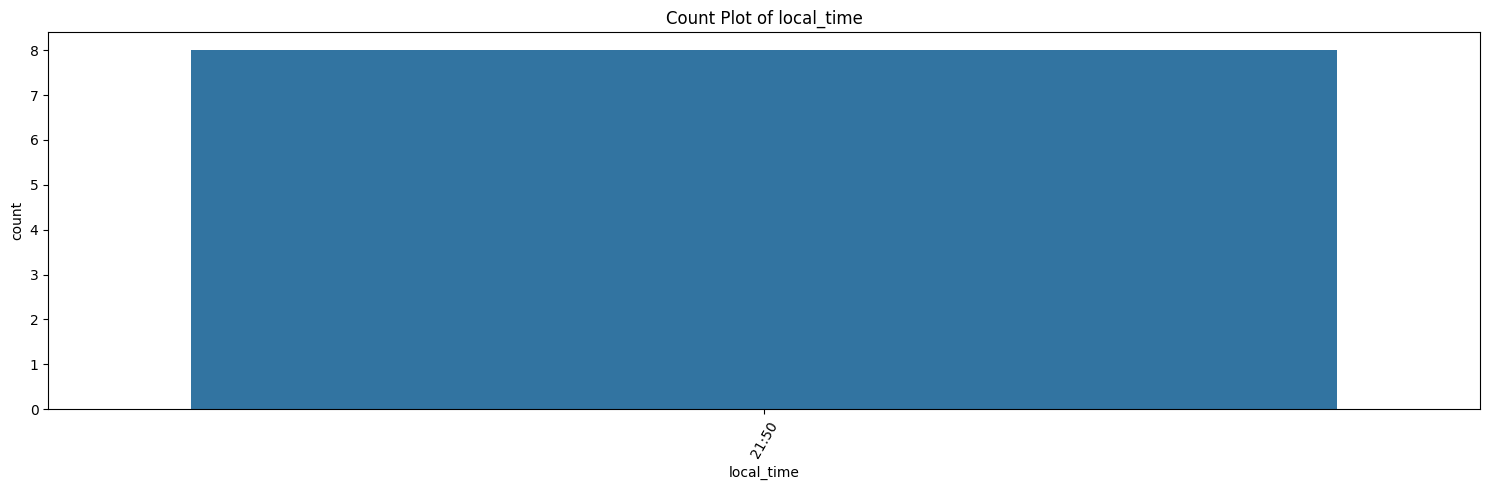

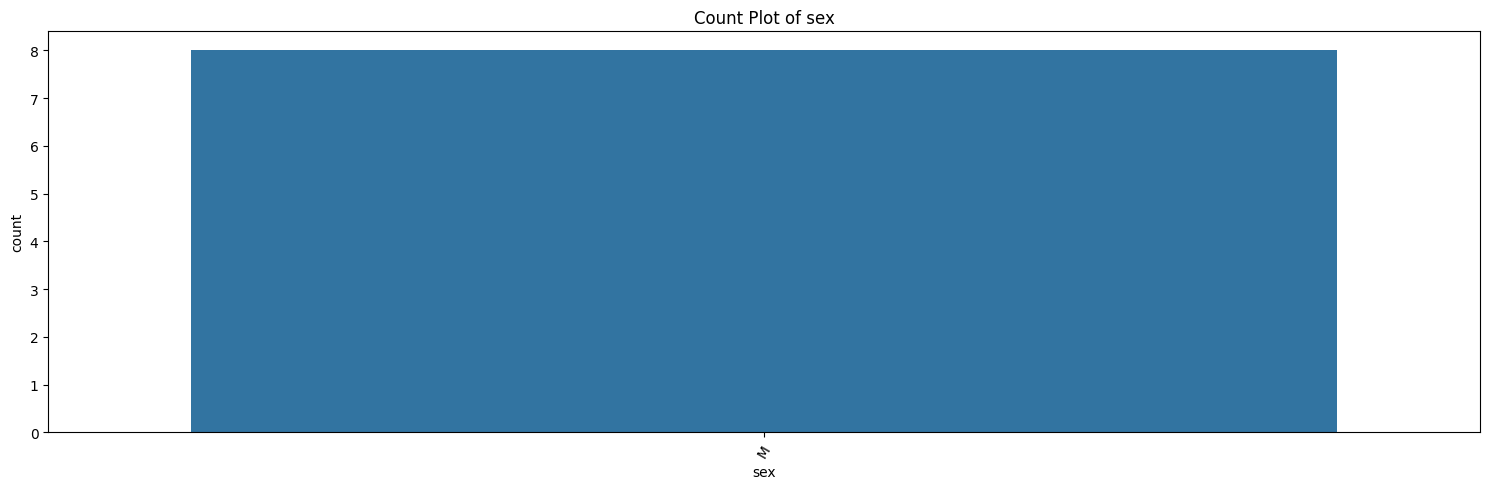

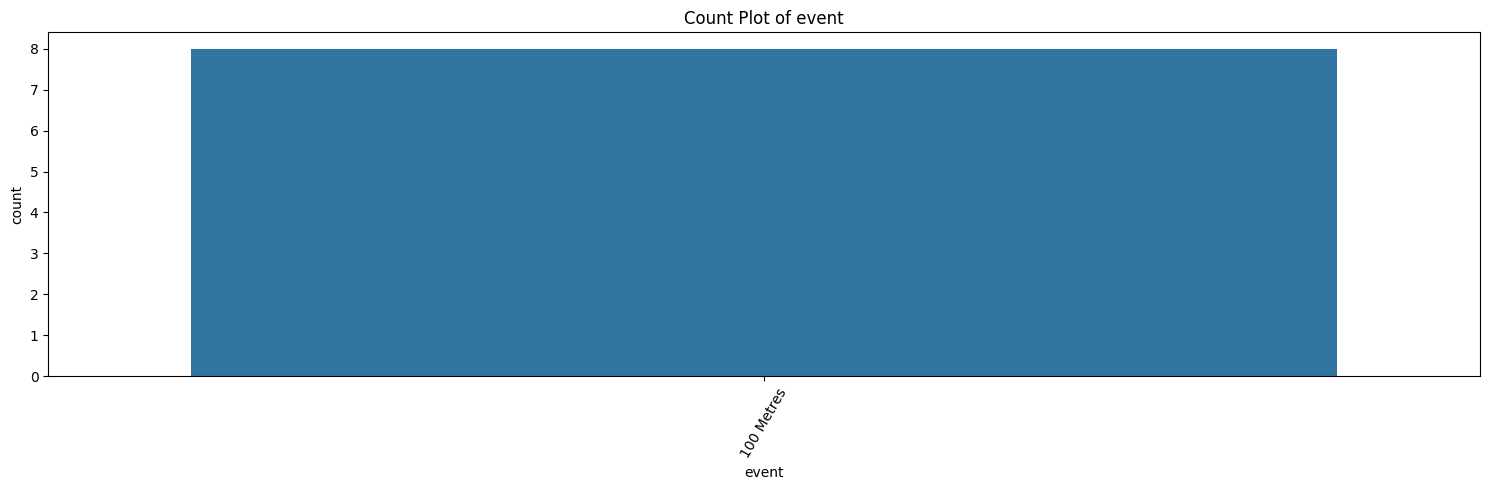

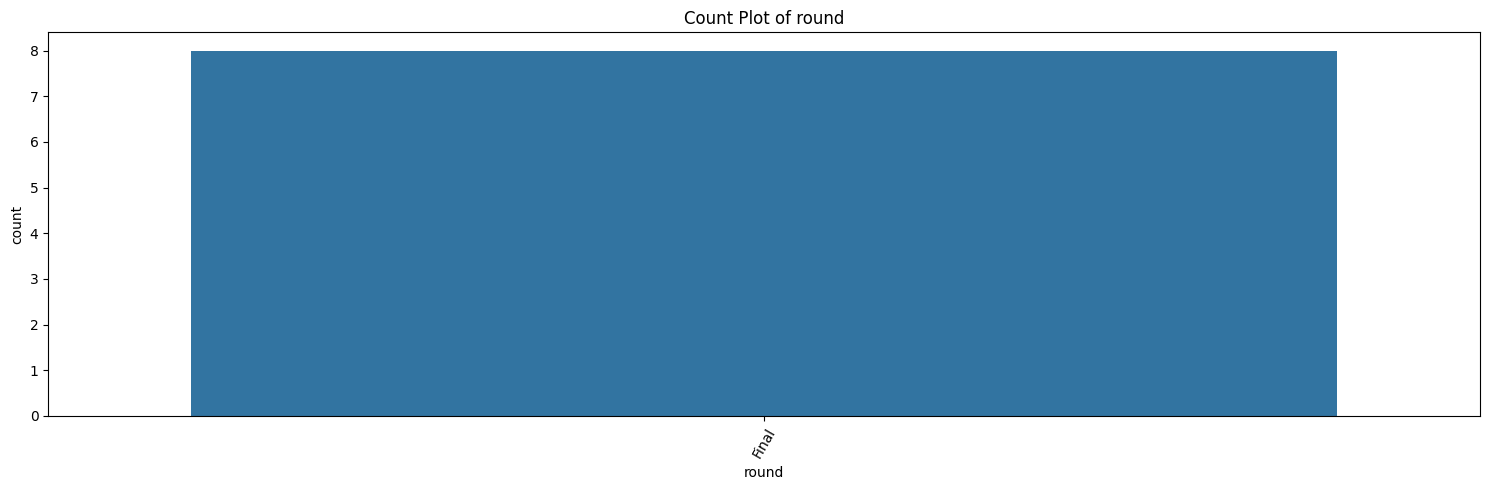

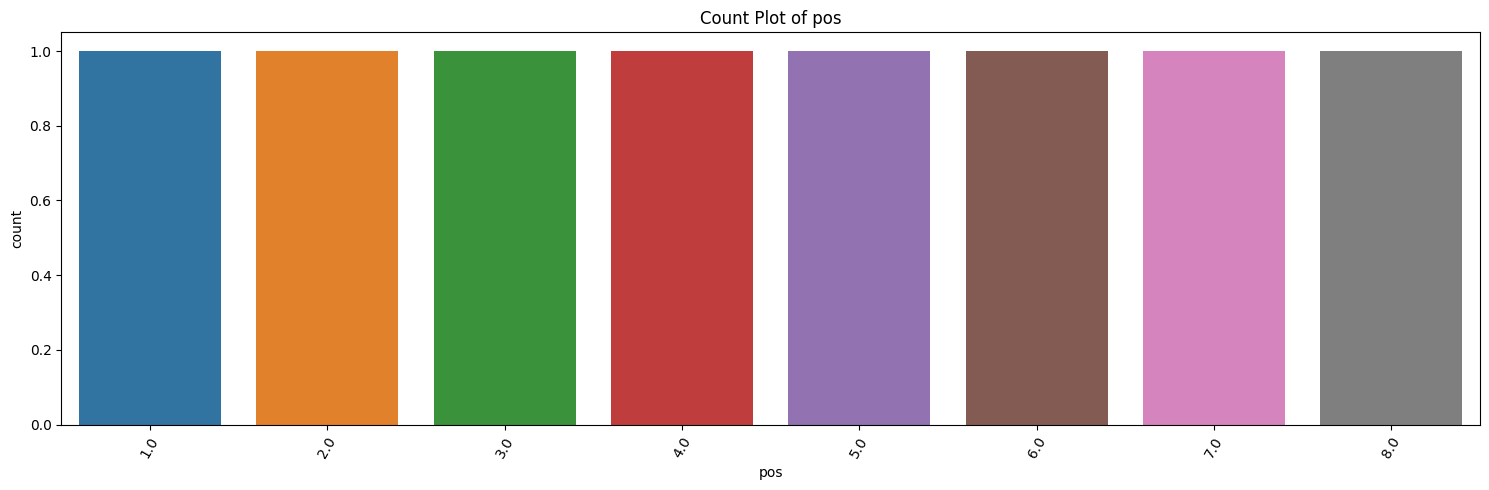

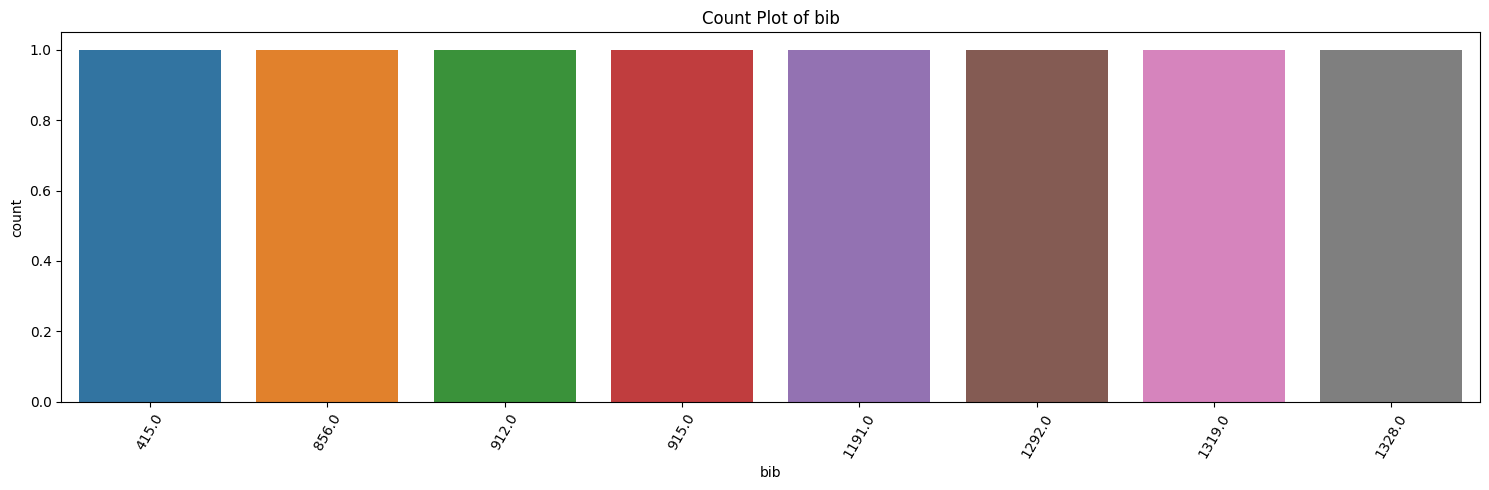

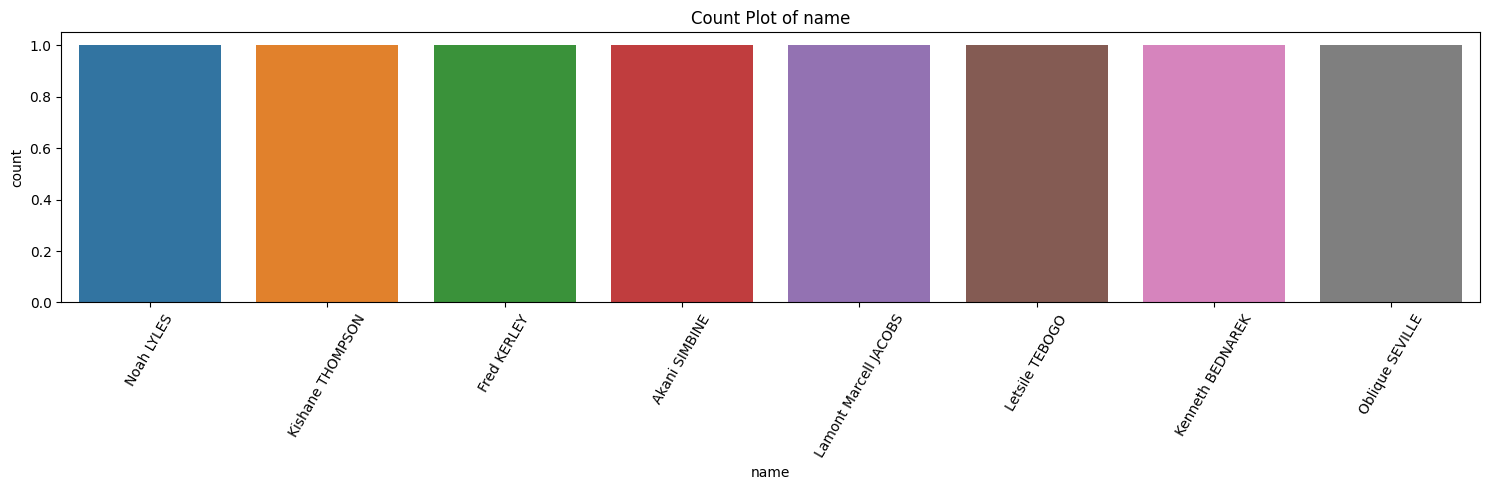

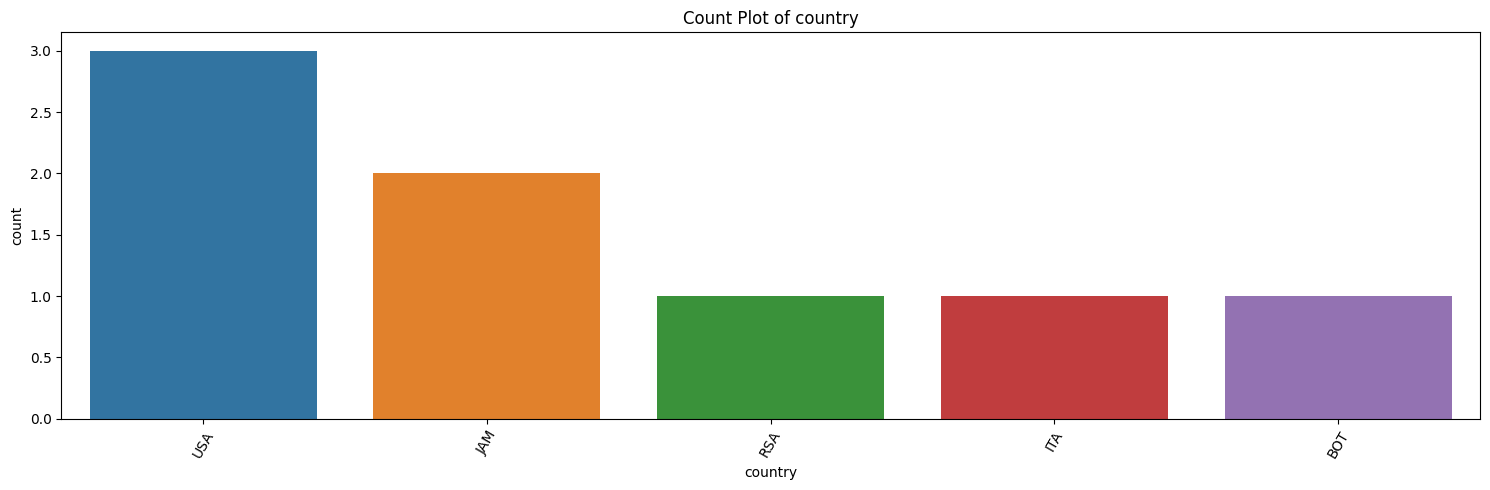

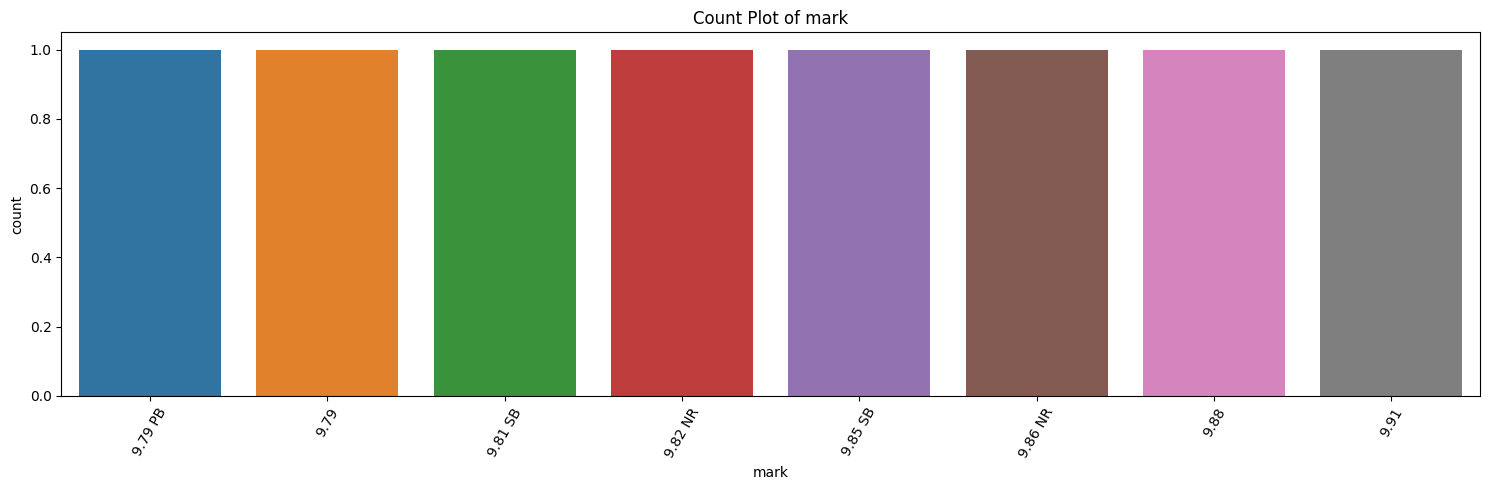

In [21]:
for feature in df_feature:
    if feature in df_feature.columns:
        plt.figure(figsize=(15,5))
        sns.countplot(data=df_feature.dropna(),x=feature)
        plt.title(f'Count Plot of {feature}')
        plt.xlabel(feature)
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()